# Author: Toni Davis 
## Harnessing the Power of AI for Effective Lead Conversion Prediction in General Sales and Marketing Project

## Data Set 1: Synthetic Data Set Representing Online Shopping Customers

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [54]:
dataSet1tr = pd.read_csv("customer_conversion_training_dataset.csv")
dataSet1ts = pd.read_csv("customer_conversion_testing_dataset.csv")

In [55]:
dataSet1tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LeadID                 100000 non-null  int64  
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Location               100000 non-null  object 
 4   LeadSource             100000 non-null  object 
 5   TimeSpent (minutes)    100000 non-null  int64  
 6   PagesViewed            100000 non-null  int64  
 7   LeadStatus             100000 non-null  object 
 8   EmailSent              100000 non-null  int64  
 9   DeviceType             100000 non-null  object 
 10  ReferralSource         100000 non-null  object 
 11  FormSubmissions        100000 non-null  int64  
 12  Downloads              100000 non-null  int64  
 13  CTR_ProductPage        100000 non-null  float64
 14  ResponseTime (hours)   100000 non-nul

In [56]:
dataSet1tr

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,56,Male,Multan,Referral,26,5,Cold,3,Desktop,ReferralSite,1,1,0.7,1,3,51,Good,0
99996,99997,56,Male,Lahore,Organic,56,5,Hot,7,Mobile,ReferralSite,2,0,0.4,1,4,91,Good,0
99997,99998,32,Female,Gujranwala,Social Media,54,10,Warm,5,Mobile,ReferralSite,3,2,0.5,16,9,61,No Payment,0
99998,99999,53,Male,Karachi,Referral,18,2,Hot,2,Desktop,Direct,1,3,0.3,18,1,187,Good,0


In [57]:
dataSet1ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26145 entries, 0 to 26144
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LeadID                 26145 non-null  int64  
 1   Age                    26145 non-null  int64  
 2   Gender                 26145 non-null  object 
 3   Location               26145 non-null  object 
 4   LeadSource             26145 non-null  object 
 5   TimeSpent (minutes)    26145 non-null  int64  
 6   PagesViewed            26145 non-null  int64  
 7   LeadStatus             26145 non-null  object 
 8   EmailSent              26145 non-null  int64  
 9   DeviceType             26145 non-null  object 
 10  ReferralSource         26145 non-null  object 
 11  FormSubmissions        26145 non-null  int64  
 12  Downloads              26145 non-null  int64  
 13  CTR_ProductPage        26145 non-null  float64
 14  ResponseTime (hours)   26145 non-null  int64  
 15  Fo

## Dataset 2 Online Education Customers 

In [58]:
dataSet2 = pd.read_csv("Leads.csv")

In [59]:
dataSet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Narrow Down Common Features and Combine Sets

The common features are referral source (lead source), timeSpent(total time on website), pagesViewed (pages viewed per visit), lead status (lead quality), EmailSent (DNE), payment history (check payment), conversion. 

## Remove Non-matching Columns 

In [60]:
dataSet2 = dataSet2.drop(columns=['Lead Origin','TotalVisits','Prospect ID','Lead Number', 'Do Not Call', 'Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content', 'Get updates on DM Content','Lead Profile', 'City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','A free copy of Mastering The Interview', 'Last Notable Activity'])


In [61]:
dataSet1tr = dataSet1tr.drop(columns=['LeadID','Age','Gender','Location','DeviceType','LeadSource','FormSubmissions','Downloads','CTR_ProductPage','ResponseTime (hours)','FollowUpEmails','SocialMediaEngagement'])
dataSet1ts = dataSet1ts.drop(columns=['LeadID','Age','Gender','Location','DeviceType','LeadSource','FormSubmissions','Downloads','CTR_ProductPage','ResponseTime (hours)','FollowUpEmails','SocialMediaEngagement'])

## Renaming Columns 

In [62]:
renamedSet2 = dataSet2.rename(columns={'Do Not Email':'EmailSent', 'Total Time Spent on Website' : 'TimeSpent','Page Views Per Visit':'PagesViewed', 'Lead Quality':'LeadStatus', 'I agree to pay the amount through cheque': 'PaymentHistory', 'Lead Source':'LeadSource'})

In [63]:
renamedSet1tr = dataSet1tr.rename(columns={'ReferralSource':'LeadSource', 'Conversion (Target)': 'Converted','TimeSpent (minutes)':'TimeSpent'})
renamedSet1ts = dataSet1ts.rename(columns={'ReferralSource':'LeadSource', 'Conversion (Target)': 'Converted','TimeSpent (minutes)':'TimeSpent'})

## Examine the Categorical Data and Match Categories

In [64]:
renamedSet1tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   TimeSpent       100000 non-null  int64 
 1   PagesViewed     100000 non-null  int64 
 2   LeadStatus      100000 non-null  object
 3   EmailSent       100000 non-null  int64 
 4   LeadSource      100000 non-null  object
 5   PaymentHistory  100000 non-null  object
 6   Converted       100000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


In [65]:
renamedSet1ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26145 entries, 0 to 26144
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TimeSpent       26145 non-null  int64 
 1   PagesViewed     26145 non-null  int64 
 2   LeadStatus      26145 non-null  object
 3   EmailSent       26145 non-null  int64 
 4   LeadSource      26145 non-null  object
 5   PaymentHistory  26145 non-null  object
 6   Converted       26145 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


In [66]:
renamedSet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LeadSource      9204 non-null   object 
 1   EmailSent       9240 non-null   object 
 2   Converted       9240 non-null   int64  
 3   TimeSpent       9240 non-null   int64  
 4   PagesViewed     9103 non-null   float64
 5   LeadStatus      4473 non-null   object 
 6   PaymentHistory  9240 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 505.4+ KB


### Lead Status

In [67]:
renamedSet1tr['LeadStatus']

0        Warm
1         Hot
2        Warm
3        Warm
4        Cold
         ... 
99995    Cold
99996     Hot
99997    Warm
99998     Hot
99999     Hot
Name: LeadStatus, Length: 100000, dtype: object

In [68]:
renamedSet2['LeadStatus']

0        Low in Relevance
1                     NaN
2                Might be
3                Not Sure
4                Might be
              ...        
9235    High in Relevance
9236             Might be
9237             Not Sure
9238                  NaN
9239             Might be
Name: LeadStatus, Length: 9240, dtype: object

Changing set 2 values to follow the hot, warm, cold format

In [69]:
for i in renamedSet2['LeadStatus']:
    if i == 'Low in Relevance':
        renamedSet2.loc[renamedSet2['LeadStatus'] == i, 'LeadStatus'] = 'Cold'
    elif i == 'Not Sure':
        renamedSet2.loc[renamedSet2['LeadStatus'] == i, 'LeadStatus'] = 'Warm'
    elif i == 'Worst':
        renamedSet2.loc[renamedSet2['LeadStatus'] == i, 'LeadStatus'] = 'Cold'
    elif i == 'Might be':
        renamedSet2.loc[renamedSet2['LeadStatus'] == i, 'LeadStatus'] = 'Warm'
    elif i == 'High in Relevance':
        renamedSet2.loc[renamedSet2['LeadStatus'] == i, 'LeadStatus'] = 'Hot'

                            

I replaced the null values with the the mode for this set

In [70]:
renamedSet2['LeadStatus'].fillna(renamedSet2['LeadStatus'].mode()[0], inplace=True)

### PaymentHistory

In [71]:
renamedSet1tr['PaymentHistory'].describe()

count     100000
unique         2
top         Good
freq       50111
Name: PaymentHistory, dtype: object

In [72]:
renamedSet2['PaymentHistory'].describe()

count     9240
unique       1
top         No
freq      9240
Name: PaymentHistory, dtype: object

In [73]:
for i in renamedSet2['PaymentHistory']:
    if i == 'No':
        renamedSet2.loc[renamedSet2['PaymentHistory'] == i, 'PaymentHistory'] = 'No Payment'

### Lead Source

In [74]:
renamedSet1tr['LeadSource'].value_counts()

LeadSource
ReferralSite    20080
Facebook        20076
Twitter         20025
Direct          19949
Google          19870
Name: count, dtype: int64

In [75]:
renamedSet2['LeadSource'].value_counts()

LeadSource
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [76]:
for i in renamedSet2['LeadSource']:
    if i == 'google':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Google'
    elif i == 'bing':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Google'
    elif i == 'Direct Traffic':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Direct'
    elif i == 'Referral Sites':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'ReferralSite'
    elif i == 'Reference':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'ReferralSite'
    elif i == 'Click2call':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'Press_Release':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'Live Chat':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'youtubechannel':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'testone':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'Pay per Click Ads':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'welearnblog_Home':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'WeLearn':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'blog':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'NC_EDM':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'Social Media':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'
    elif i == 'Welingak Website':
        renamedSet2.loc[renamedSet2['LeadSource'] == i, 'LeadSource'] = 'Other'


    

In [77]:
renamedSet2['LeadSource'].value_counts()

LeadSource
Google            2879
Direct            2543
Olark Chat        1755
Organic Search    1154
ReferralSite       659
Other              159
Facebook            55
Name: count, dtype: int64

In [78]:
renamedSet2['LeadSource'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: LeadSource
Non-Null Count  Dtype 
--------------  ----- 
9204 non-null   object
dtypes: object(1)
memory usage: 72.3+ KB


In [79]:
renamedSet2['LeadSource'].fillna(renamedSet2['LeadSource'].mode()[0], inplace=True)

## Filling missing values

In [80]:
renamedSet2['PagesViewed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: PagesViewed
Non-Null Count  Dtype  
--------------  -----  
9103 non-null   float64
dtypes: float64(1)
memory usage: 72.3 KB


In [81]:
renamedSet2['PagesViewed'].fillna(0,inplace=True)

### Email Sent

In [83]:
for i in renamedSet2['EmailSent']:
    if i == 'Yes':
        renamedSet2.loc[renamedSet2['EmailSent'] == i, 'EmailSent'] = '1'
    elif i == 'No':
        renamedSet2.loc[renamedSet2['EmailSent'] == i, 'EmailSent'] = '0'

In [37]:
for i in renamedSet1tr['EmailSent']:
    if i > 0:
        renamedSet1tr.loc[renamedSet1tr['EmailSent'] == i, 'EmailSent'] = '1'
    elif i <= 0:
        renamedSet1tr.loc[renamedSet1tr['EmailSent'] == i, 'EmailSent'] = '0'

In [38]:
for i in renamedSet1ts['EmailSent']:
    if i > 0:
        renamedSet1ts.loc[renamedSet1ts['EmailSent'] == i, 'EmailSent'] = '1'
    elif i <= 0:
        renamedSet1ts.loc[renamedSet1ts['EmailSent'] == i, 'EmailSent'] = '0'

## Splitting Set 2 into training and test sets

In [84]:
train, test = train_test_split(renamedSet2, test_size=0.2, random_state=0)

## Combinding the Sets of Training and Test Data

In [85]:
train = pd.concat([renamedSet1tr, train], axis=0, ignore_index=True)

In [86]:
test = pd.concat([renamedSet1ts, test], axis=0, ignore_index=True)

In [42]:
train.to_csv('finalTrain.csv')
test.to_csv('finalTest.csv')

## Examining the Data

In [87]:
train

,TimeSpent,PagesViewed,LeadStatus,EmailSent,LeadSource,PaymentHistory,Converted
0,30,13.0,Warm,1,Google,No Payment,0
1,28,4.0,Hot,7,Direct,No Payment,0
2,45,10.0,Warm,9,Direct,No Payment,0
3,45,15.0,Warm,5,ReferralSite,Good,0
4,31,11.0,Cold,2,Google,No Payment,0
...,...,...,...,...,...,...,...
107387,1055,4.0,Warm,0,Google,No Payment,1
107388,74,2.0,Warm,1,Direct,No Payment,0
107389,0,0.0,Warm,0,Olark Chat,No Payment,0
107390,0,0.0,Warm,0,Olark Chat,No Payment,0


In [88]:
test

,TimeSpent,PagesViewed,LeadStatus,EmailSent,LeadSource,PaymentHistory,Converted
0,46,6.00,Hot,10,Facebook,Good,0
1,42,8.00,Warm,6,Direct,No Payment,0
2,56,11.00,Cold,1,Direct,Good,0
3,24,15.00,Cold,6,Direct,Good,0
4,39,14.00,Hot,10,Direct,Good,0
...,...,...,...,...,...,...,...
27988,1594,2.67,Warm,0,Direct,No Payment,1
27989,788,5.00,Hot,0,Direct,No Payment,1
27990,967,1.00,Warm,0,Other,No Payment,1
27991,347,4.00,Warm,0,Google,No Payment,0


<Axes: title={'center': 'Lead Source'}, xlabel='LeadSource'>

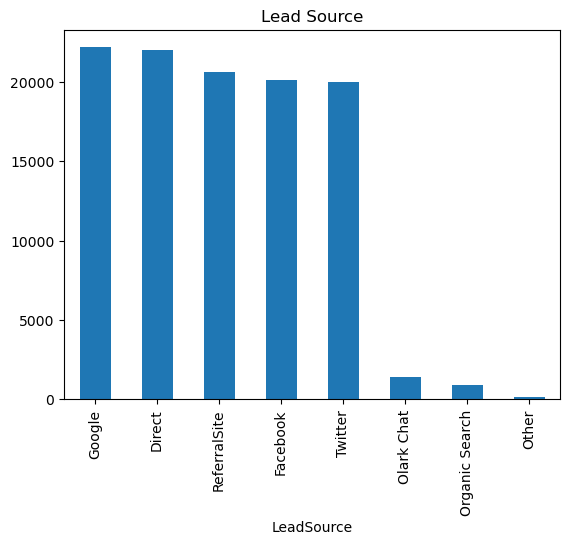

In [89]:
train['LeadSource'].value_counts().plot(kind='bar', title='Lead Source')

In [92]:
train.groupby(['Converted','LeadStatus']).agg({'LeadStatus': 'count'})

LeadStatus
Converted LeadStatus            
0         Cold             33662
          Hot              32336
          Warm             36909
1         Cold               717
          Hot               1456
          Warm              2312

In [96]:
train.groupby(['LeadStatus']).agg({'LeadStatus': 'count'})

,LeadStatus
LeadStatus,
Cold,34379
Hot,33792
Warm,39221


In [94]:
train.groupby(['Converted','LeadSource']).agg({'LeadSource': 'count'})

LeadSource
Converted LeadSource                
0         Direct               21016
          Facebook             19783
          Google               20914
          Olark Chat            1046
          Organic Search         589
          Other                   10
          ReferralSite         19855
          Twitter              19694
1         Direct                 995
          Facebook               338
          Google                1259
          Olark Chat             351
          Organic Search         346
          Other                  116
          ReferralSite           749
          Twitter                331

### Converting Categorical Data into numeric Categories

In [47]:
train['LeadSource'] = train['LeadSource'].map({'Direct' : 1, 'Facebook' : 2 , 'Google': 3, 'Olark Chat': 4, 'Organic Search': 5, 'Other': 6, 'ReferralSite':7, 'Twitter': 8})
train['LeadStatus'] = train['LeadStatus'].map({'Hot' : 1, 'Warm' : 2 , 'Cold': 3})
train['PaymentHistory'] = train['PaymentHistory'].map({'No Payment' : 0, 'Good' : 1})

test['LeadSource'] = test['LeadSource'].map({'Direct' : 1, 'Facebook' : 2 , 'Google': 3, 'Olark Chat': 4, 'Organic Search': 5, 'Other': 6, 'ReferralSite':7, 'Twitter': 8})
test['LeadStatus'] = test['LeadStatus'].map({'Hot' : 1, 'Warm' : 2 , 'Cold': 3})
test['PaymentHistory'] = test['PaymentHistory'].map({'No Payment' : 0, 'Good' : 1})

In [48]:
train.to_csv('NumericTrain.csv')
test.to_csv('NumericTest.csv')

In [49]:
train.groupby(['LeadStatus']).agg({'Converted': 'count'})

,Converted
LeadStatus,
1,33792
2,39221
3,34379


In [50]:
train.groupby(['Converted']).agg({'LeadStatus': 'count'})

,LeadStatus
Converted,
0,102907
1,4485
